## DAB 401 Financial Analytics
### TATA Global Beverages Limited Stock Price Prediction
#### Section 3
#### Group 5
- Hari Sai Palem - 0747511
- Manoj Reddy Lenkala - 0753802
- Naveen Kumar Tedla - 0753623
- Sunil Kumar Vidam - 0735027
- Taquee Qureshi - 0754265

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
os.environ['PYTHONHASHSEED']=str(0)
import tensorflow
import random as rn

In [2]:
# Loading the dataset
dataframe = pd.read_csv('NSE-TATAGLOBAL.csv')

In [3]:
# Checking for NAs
dataframe.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [4]:
# Checking for Duplicates
dataframe.duplicated().sum()

0

In [5]:
# Checking for datatypes
dataframe.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

In [6]:
# Converting the 'Date' feature datatype to datetime
dataframe['Date'] = pd.to_datetime(dataframe['Date'], infer_datetime_format=True, errors='coerce')

In [7]:
dataframe.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity           float64
Turnover (Lacs)                float64
dtype: object

In [8]:
# Displaying first 5 rows of the dataframe
dataframe.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


In [9]:
# Resetting the index of the dataframe
dataframe = dataframe.iloc[::-1].reset_index().drop(columns=['index'])
dataframe.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


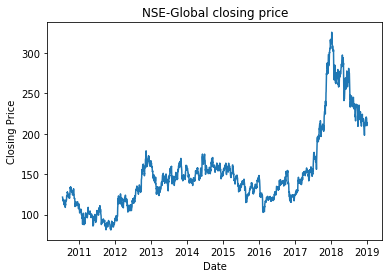

In [10]:
# Plotting the Closing price
plt.plot(dataframe.Date,dataframe.Close)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('NSE-Global closing price')
plt.show()

##### Preparing the data for building LSTM network

In [11]:
# Importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Creating dataframe with Date and Closing price
data = dataframe
df = pd.DataFrame(index=range(0,len(dataframe)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    df['Date'][i] = data['Date'][i]
    df['Close'][i] = data['Close'][i]


Using TensorFlow backend.


In [12]:
# Converting the datatype of Date feature to datetime
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
# Creating a copy of the dataframe.
df1 = df.copy()

In [13]:
# Setting Date as index
df.index = df.Date
# Dropping the Date feature
df.drop('Date', axis=1, inplace=True)

# Creating train and test sets
dataset = df.values
train = dataset[:1680,:]
test = dataset[1680:,:]

In [14]:
# Scaling the dataset
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

In [15]:
# Converting dataset into X_train and Y_train to get 20 timestamps for the current instance
X_train, Y_train = [], []
for i in range(20,len(train)):
    X_train.append(scaled_data[i-20:i,0])
    Y_train.append(scaled_data[i,0])
# Reshaping the features without changing the data
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

### LSTM 

In [16]:
# Setting the seed
np.random.seed(0)
tensorflow.random.set_seed(0)
rn.seed(0)
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=2)

# Predicting values, using past 20 from the train data
inputs = df[len(df) - len(test) - 20:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)


X_test = []
Y_test = []
for i in range(20,inputs.shape[0]):
    X_test.append(inputs[i-20:i,0])
    Y_test.append(inputs[i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)

Epoch 1/20
 - 2s - loss: 0.0041
Epoch 2/20
 - 1s - loss: 9.6090e-04
Epoch 3/20
 - 1s - loss: 8.8829e-04
Epoch 4/20
 - 1s - loss: 8.2685e-04
Epoch 5/20
 - 1s - loss: 7.5227e-04
Epoch 6/20
 - 2s - loss: 7.3927e-04
Epoch 7/20
 - 1s - loss: 6.5931e-04
Epoch 8/20
 - 1s - loss: 6.6809e-04
Epoch 9/20
 - 1s - loss: 7.1821e-04
Epoch 10/20
 - 1s - loss: 6.6225e-04
Epoch 11/20
 - 2s - loss: 6.2754e-04
Epoch 12/20
 - 2s - loss: 5.3220e-04
Epoch 13/20
 - 2s - loss: 5.4846e-04
Epoch 14/20
 - 2s - loss: 5.0119e-04
Epoch 15/20
 - 2s - loss: 5.2254e-04
Epoch 16/20
 - 2s - loss: 5.0552e-04
Epoch 17/20
 - 2s - loss: 4.7620e-04
Epoch 18/20
 - 2s - loss: 4.6028e-04
Epoch 19/20
 - 2s - loss: 4.8868e-04
Epoch 20/20
 - 2s - loss: 4.3179e-04


In [17]:
# Calculating the R-squared error
from sklearn import metrics
R2_lstm = metrics.r2_score(Y_test, closing_price)
print(R2_lstm)

0.9348334072225956


In [18]:
closing_price = scaler.inverse_transform(closing_price)

In [19]:
# Calculating the root mean squared error
rmse_lstm=np.sqrt(np.mean(np.power((test-closing_price),2)))
rmse_lstm

11.833582002503526

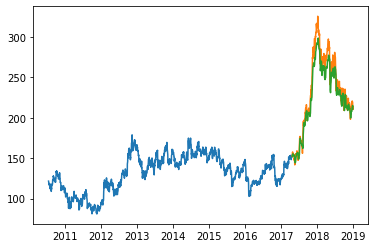

In [20]:
# Plotting the actual and predicted prices
train = df[:1680]
test = df[1680:]
test['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(test[['Close','Predictions']])

- From the above plot, LSTM has predicted the stock almost in accordance with the actual values plot.

### FB Prophet

In [21]:
dataframe.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


In [22]:
# Storing the date and close prices in two new columns
dataframe[['ds','y']]= dataframe[['Date','Close']]
dataframe.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),ds,y
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56,2010-07-21,121.55
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17,2010-07-22,120.90
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31,2010-07-23,120.65
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01,2010-07-26,117.60
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98,2010-07-27,118.65


In [23]:
# Dropping all features except ds and y
prophet_df = dataframe.drop(columns=['Date','High','Low','Open','Last','Close','Total Trade Quantity','Turnover (Lacs)'])
prophet_df.head()

,ds,y
0,2010-07-21,121.55
1,2010-07-22,120.90
2,2010-07-23,120.65
3,2010-07-26,117.60
4,2010-07-27,118.65


In [24]:
from fbprophet import Prophet
model1 = Prophet()
# Training the model with data 
model1.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
# Creating 120 periods
future = model1.make_future_dataframe(periods = 120)
future.tail()

,ds
2215,2019-04-30
2216,2019-05-01
2217,2019-05-02
2218,2019-05-03
2219,2019-05-04


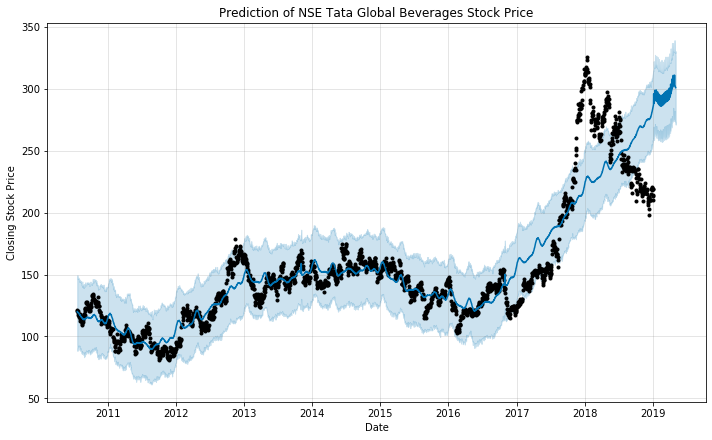

,ds,yhat,yhat_lower,yhat_upper
2215,2019-04-30,302.248784,274.045116,332.087064
2216,2019-05-01,301.926290,273.308898,329.590002
2217,2019-05-02,302.028975,273.684687,328.906812
2218,2019-05-03,301.092809,272.687828,330.506099
2219,2019-05-04,300.932555,271.114922,326.023458


In [26]:
# Making the predictions
predictions = model1.predict(future)
# Plotting the predictions
model1.plot(predictions)
plt.title("Prediction of NSE Tata Global Beverages Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

- The black dots represent the observed values and the blue line represents the forecast in the above plot. The blue shaded regions represent the uncertainty intervals of the forecast.
- From the plot, the predition is similar to actual values until 2017. The predictions for the next 120 periods indicates the increase in the stock price.
- Below the plot, 'yhat' represents the forecasted values of 'y', 'yhat_lower' and 'yhat_upper' represent the lower and upper bounds of the forecasted values respectively.

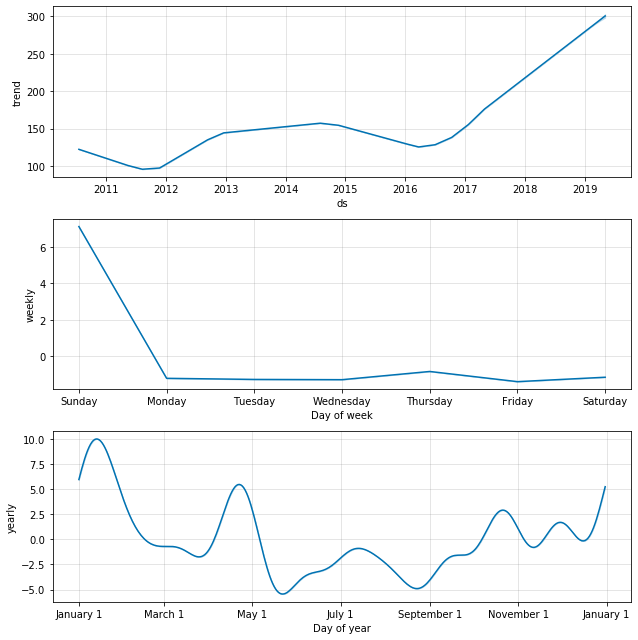

In [27]:
model1.plot_components(predictions)
plt.show()

- From the first of the above plots, the overall trend of the forecast is positive.
- From the second plot, it is clear that sundays have been crucial for the stock price as it is high on that day and there is no seasonality.
- From the yearly trend plot, the stock price is during January and low during May. 

In [28]:
predictions = model1.predict(future)
predictions[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2215,2019-04-30,302.248784,276.054666,330.211037
2216,2019-05-01,301.926290,275.458962,330.711567
2217,2019-05-02,302.028975,273.786733,327.792199
2218,2019-05-03,301.092809,272.243667,328.164503
2219,2019-05-04,300.932555,271.261456,331.634169


In [29]:
se = np.square(predictions.loc[:, 'yhat'] - prophet_df.y)
mse = np.mean(se)
rmse_prophet = np.sqrt(mse)

In [30]:
rmse_prophet

21.656918534301763

### Linear Regression

In [31]:
X = df1['Date']
Y = df1['Close']

In [32]:
# Splitting the features set and target set to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [33]:
# Converting X_train, X-test to arrays and reshaping
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [34]:
scaler.fit(X_train)
# Scaling X_train and X_test using MinMaxScaler 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train_scaled,Y_train)
Y_lr_pred=lr_model.predict(X_test_scaled)

In [36]:
from sklearn import metrics
R2_lr = metrics.r2_score(Y_test, Y_lr_pred)
R2_lr

0.5337399500549806

In [37]:
rmse_lr = np.sqrt(metrics.mean_squared_error(Y_test, Y_lr_pred))
rmse_lr

33.37139895928384

- It is actually considered good to have high R-squared value. In this case, the linear regression model has given us an R-squared value of 0.53 which indicates that it is not a better model.

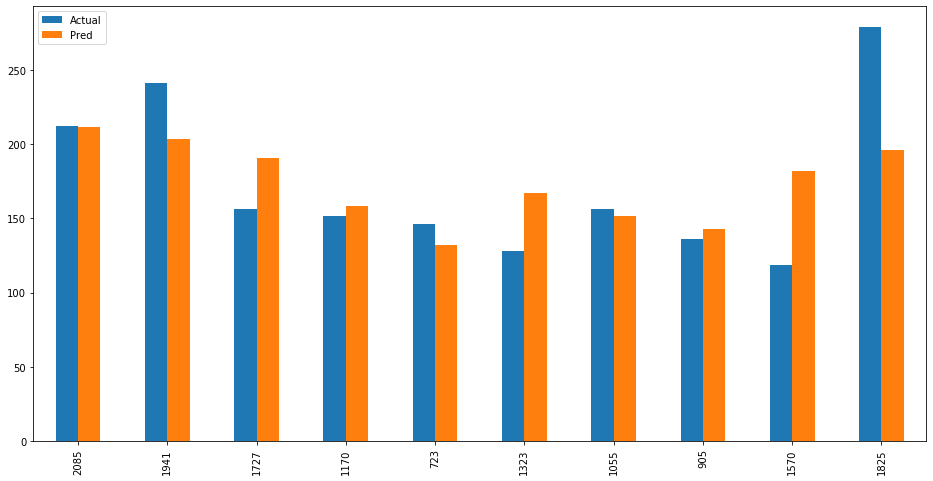

In [38]:
# Plotting actual and predicted prices
plot_df=pd.DataFrame({'Actual':Y_test,'Pred':Y_lr_pred})
plot_df.head(10).plot(kind='bar',figsize=(16,8))
plt.show()

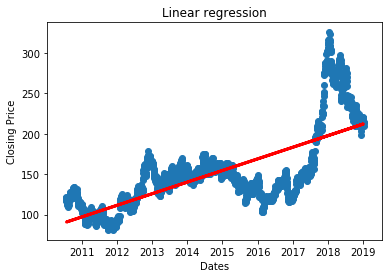

In [39]:
# Linear Regression Plot
plt.scatter(X, Y, cmap='autumn')
plt.plot(X_test, Y_lr_pred, color='red', linewidth=3)
plt.title('Linear regression')
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.show()

- The blue dots in the above plot represent the actual values of the stock price, the straight red line represents the predictions made by the linear regression model.

# -------------------------------------------------------------------------

In [40]:
df.head()

,Close
Date,
2010-07-21,121.55
2010-07-22,120.9
2010-07-23,120.65
2010-07-26,117.6
2010-07-27,118.65


##### Decomposing the time series

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

<Figure size 432x288 with 0 Axes>

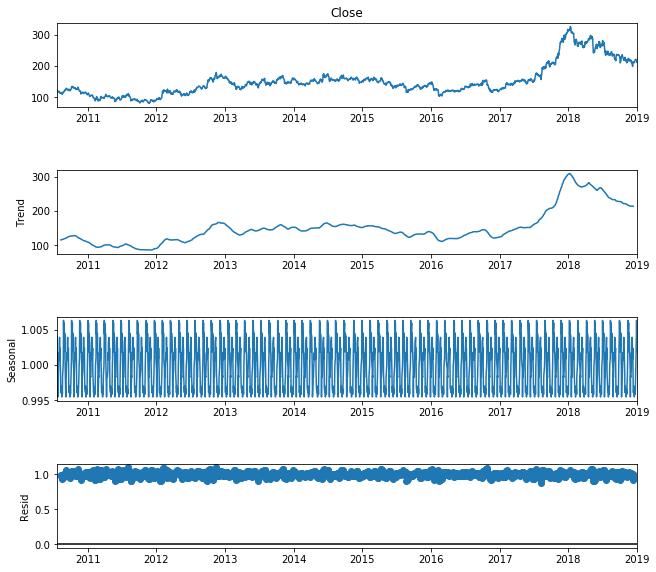

In [42]:
result = seasonal_decompose(df.Close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(10, 9)

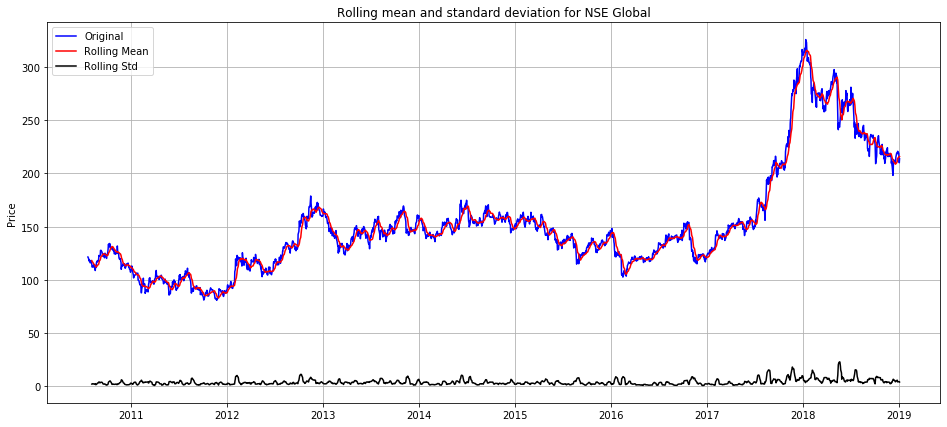

In [43]:
rolling_mean = df['Close'].rolling(12).mean()
rolling_std = df['Close'].rolling(12).std()

plt.figure(figsize = (16, 7))
fig=plt.figure(1)

orig = plt.plot(df['Close'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation for NSE Global')
plt.grid()
plt.ylabel("Price")
plt.show()

##### Simple Moving Average

In [44]:
# create 25 days simple moving average column
df['SMA_25'] = df['Close'].rolling(window = 25, min_periods = 1).mean()
# display first few rows
df.head()

,Close,SMA_25
Date,,
2010-07-21,121.55,121.550000
2010-07-22,120.9,121.225000
2010-07-23,120.65,121.033333
2010-07-26,117.6,120.175000
2010-07-27,118.65,119.870000


Text(0, 0.5, 'Close')

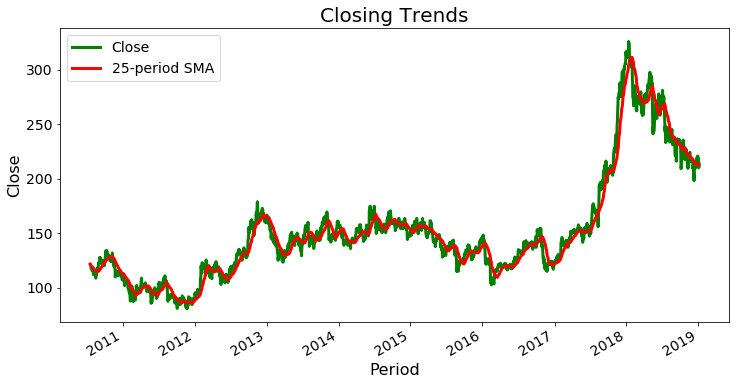

In [45]:
# colors for the line plot
colors = ['green', 'red']


# line plot for demand
df.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Close', '25-period SMA'], fontsize=14)

# title and labels
plt.title('Closing Trends', fontsize=20)
plt.xlabel('Period', fontsize=16)
plt.ylabel('Close', fontsize=16)

- The simple moving average forecast is similar to that of the actual stock price distribution.

In [46]:
df['Error_25'] = df.Close-df.SMA_25
df.head()

,Close,SMA_25,Error_25
Date,,,
2010-07-21,121.55,121.550000,0
2010-07-22,120.9,121.225000,-0.325
2010-07-23,120.65,121.033333,-0.383333
2010-07-26,117.6,120.175000,-2.575
2010-07-27,118.65,119.870000,-1.22


In [47]:
MAE_SMA = df.Error_25.abs().mean()  
print("MAE:",round(MAE_SMA,2)) 
RMSE_SMA = np.sqrt((df.Error_25**2).mean())
print("RMSE:",round(RMSE_SMA,2))
MSE_SMA= (df.Error_25**2).mean()
print("MSE:",round(MSE_SMA,2))

MAE: 6.28
RMSE: 8.7
MSE: 75.6


In [48]:
df = df.drop(columns=['SMA_25', 'Error_25'])

##### Exponential Moving Average

In [49]:
df['EMA_25'] = df['Close'].ewm(span = 25, adjust = False).mean()
df['EMA_50'] = df['Close'].ewm(span = 50, adjust = False).mean()

In [50]:
df['Signal'] = 0.0  
df['Signal'] = np.where(df['EMA_25'] > df['EMA_50'], 1.0, 0.0)

In [51]:
df['Position'] = df['Signal'].diff()

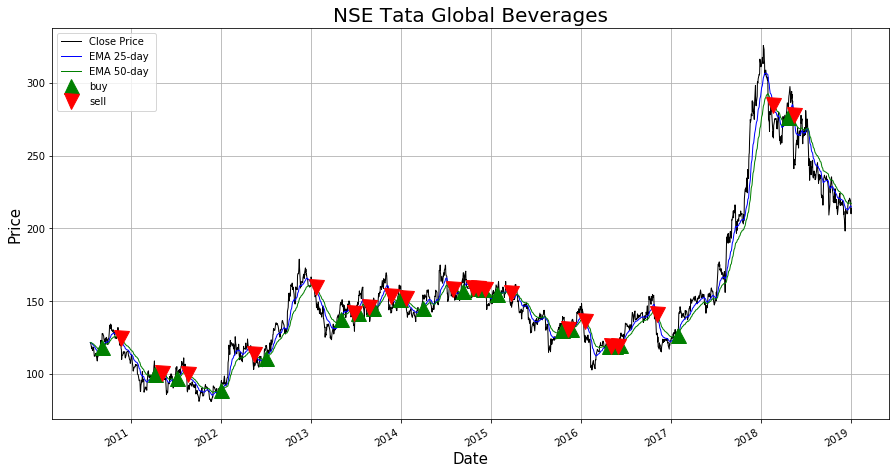

In [52]:
plt.figure(figsize = (15,8))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', lw = 1, label = 'Close Price')  
df['EMA_25'].plot(color = 'b', lw = 1, label = 'EMA 25-day ') 
df['EMA_50'].plot(color = 'g', lw = 1, label = 'EMA 50-day ')
# plot ‘buy’ and 'sell' signals
plt.plot(df[df['Position'] == 1].index, 
         df['EMA_25'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df[df['Position'] == -1].index, 
         df['EMA_50'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('NSE Tata Global Beverages' , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

- The black line represents the actual observations distribution, the blue and green lines represent exponential moving averages for lengths of 25 and 50 days respectively. The upward green triangles state us to buy the stock at that time and the downward red triangles to sell the stock at that point of time.

In [53]:
from tabulate import tabulate

df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------+----------+----------+----------+------------+
| Date                |   Close |   EMA_25 |   EMA_50 |   Signal | Position   |
|---------------------+---------+----------+----------+----------+------------|
| 2010-09-07 00:00:00 |  127.7  | 118.706  | 118.525  |        1 | Buy        |
| 2010-11-23 00:00:00 |  117.2  | 124.392  | 124.648  |        0 | Sell       |
| 2011-04-08 00:00:00 |  104.65 | 100.068  | 100.004  |        1 | Buy        |
| 2011-05-06 00:00:00 |   97.55 | 100.424  | 100.446  |        0 | Sell       |
| 2011-07-07 00:00:00 |  105    |  97.1614 |  96.856  |        1 | Buy        |
| 2011-08-22 00:00:00 |   90.6  |  99.8876 | 100.041  |        0 | Sell       |
| 2012-01-03 00:00:00 |   94.55 |  88.5798 |  88.3366 |        1 | Buy        |
| 2012-05-15 00:00:00 |  104.85 | 113.594  | 113.714  |        0 | Sell       |
| 2012-07-02 00:00:00 |  117.95 | 111.065  | 110.917  |        1 | Buy        |
| 2013-01-22 00:00:00 |  151.85 | 159.59

## --------------------------------------------------------------------------

In [54]:
df.head()

,Close,EMA_25,EMA_50,Signal,Position
Date,,,,,
2010-07-21,121.55,121.550000,121.550000,0.0,NaN
2010-07-22,120.9,121.500000,121.524510,0.0,0.0
2010-07-23,120.65,121.434615,121.490215,0.0,0.0
2010-07-26,117.6,121.139645,121.337658,0.0,0.0
2010-07-27,118.65,120.948134,121.232259,0.0,0.0


In [55]:
df = df.drop(columns=['EMA_25', 'EMA_50', 'Signal', 'Position'])
df.head()

,Close
Date,
2010-07-21,121.55
2010-07-22,120.9
2010-07-23,120.65
2010-07-26,117.6
2010-07-27,118.65


# --------------------------------------------------------------------

### Exponential Smoothing
##### Augmented Dicky Fuller Test

In [56]:
from statsmodels.tsa.stattools import adfuller
# Run Dicky-Fuller test
result = adfuller(df['Close'])
# Print test statistic
print(result)

(-1.1295173722552614, 0.7031583533412626, 16, 2083, {'1%': -3.4334932438197754, '5%': -2.862928546266631, '10%': -2.5675091975687785}, 10811.222472672493)


In [57]:
print("ADF statistic value :", result[0])
print("p-value: ", result[1])

ADF statistic value : -1.1295173722552614
p-value:  0.7031583533412626


- The test statistic value is greater than the significant values, p-value is greater than 0.05 which means that the time-series is non-stationary.

In [58]:
train = df[:1680]
test = df[1680:]

##### Simple Exponential Smoothing

MAE 80.46
MSE 8,564.72
RMSE 92.55


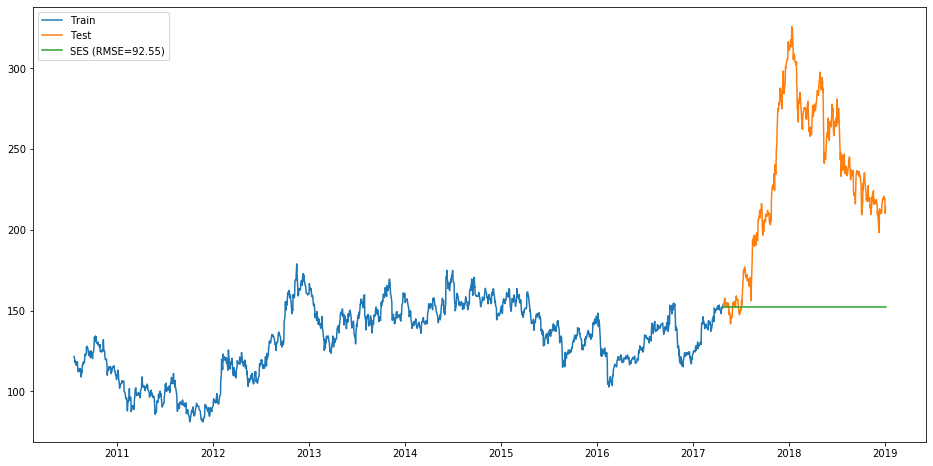

In [59]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Fit the model
pred = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Close'])).fit(smoothing_level=0.3,optimized=False)
pred['SES'] = fit2.forecast(len(test))
# Calculate KPI's
mae = mean_absolute_error(test.Close, pred.SES)
mse=mean_squared_error(test.Close, pred.SES)
rmse_SES = sqrt(mean_squared_error(test.Close, pred.SES))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse_SES))
# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(pred['SES'], label='SES (RMSE={:.2f})'.format(rmse_SES)) 
plt.legend()
plt.show()

- We have used a smoothing factor for level (alpha) = 0.3 for SES. The forecast is a green horizontal line, the orange pattern is the test set and the blue pattern is the train set. 

In [60]:
pred.SES

Date
2017-04-27    152.071758
2017-04-28    152.071758
2017-05-02    152.071758
2017-05-03    152.071758
2017-05-04    152.071758
                 ...    
2018-12-31    152.071758
2019-01-01    152.071758
2019-01-02    152.071758
2019-01-03    152.071758
2019-01-04    152.071758
Name: SES, Length: 420, dtype: float64

##### Double Exponential Smoothing

MAE 60.30
MSE 7,193.50
RMSE 84.81


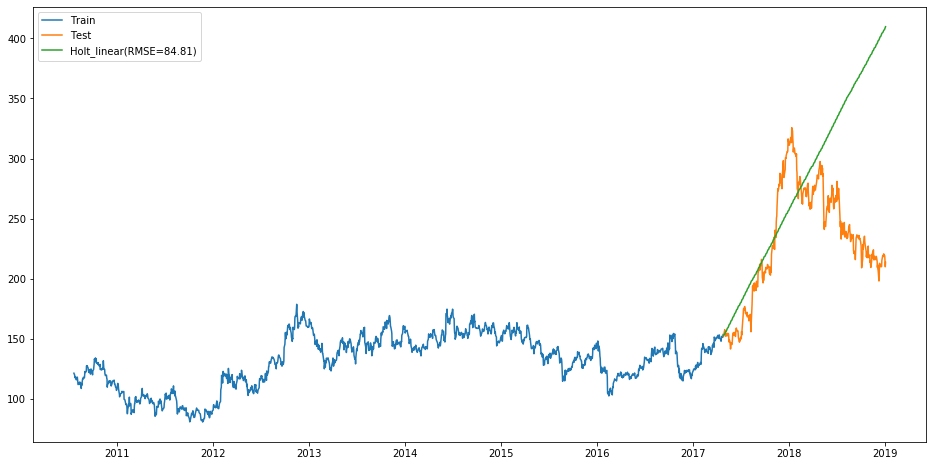

In [61]:
# Fit the model
pred = test.copy()
fit1 = Holt(np.asarray(train['Close'])).fit(smoothing_level = 0.3,smoothing_slope = 0.4)
pred['Holt_linear'] = fit1.forecast(len(test))
# Calculate KPI
mae = mean_absolute_error(test.Close, pred.Holt_linear)
mse=mean_squared_error(test.Close, pred.Holt_linear)
rmse_DES = sqrt(mean_squared_error(test.Close, pred.Holt_linear))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse_DES))
# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(pred['Holt_linear'], label='Holt_linear(RMSE={:.2f})'.format(rmse_DES))
plt.legend()
plt.show()

- The forecast for the stock price is increasing in the above plot.

In [62]:
pred.Holt_linear

Date
2017-04-27    152.792234
2017-04-28    153.405371
2017-05-02    154.018509
2017-05-03    154.631646
2017-05-04    155.244784
                 ...    
2018-12-31    407.244337
2019-01-01    407.857475
2019-01-02    408.470612
2019-01-03    409.083750
2019-01-04    409.696888
Name: Holt_linear, Length: 420, dtype: float64

##### Triple Exponential Smoothing

MAE 75.28
MSE 7,646.44
RMSE 87.44


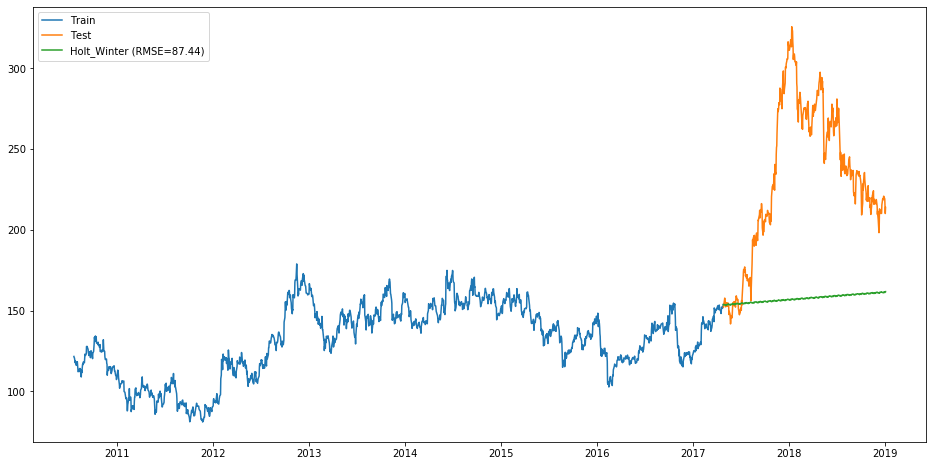

In [63]:
# Fit the model
pred = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()

pred['Holt_Winter'] = fit1.forecast(len(test))
# Calculate KPI's
mae = mean_absolute_error(test.Close, pred.Holt_Winter)
mse=mean_squared_error(test.Close, pred.Holt_Winter)
rmse_TES = sqrt(mean_squared_error(test.Close, pred.Holt_Winter))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse_TES))
# Plot
plt.figure(figsize=(16,8))
plt.plot( train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(pred['Holt_Winter'], label='Holt_Winter (RMSE={:.2f})'.format(rmse_TES))

plt.legend()
plt.show()

- The forecast in the above plot is slightly increasing.

In [64]:
pred.Holt_Winter

Date
2017-04-27    153.628057
2017-04-28    153.790316
2017-05-02    153.511306
2017-05-03    153.350923
2017-05-04    153.333169
                 ...    
2018-12-31    161.425556
2019-01-01    161.106055
2019-01-02    161.394048
2019-01-03    161.696133
2019-01-04    161.715837
Name: Holt_Winter, Length: 420, dtype: float64

In [65]:
RMSE = {'Method':['Long Short Term Memory', 'FBProphet', 'Linear Regression', 'Simple Moving Average', 
                  'Simple Exponential Smoothing', 'Double Exponential Smoothing', 'Triple Exponential Smoothing'],
       'RMSE':[rmse_lstm, rmse_prophet, rmse_lr, RMSE_SMA, rmse_SES, rmse_DES, rmse_TES]}
RMSE = pd.DataFrame(RMSE)
RMSE.sort_values(by = 'RMSE', ascending = True)

,Method,RMSE
3,Simple Moving Average,8.695034
0,Long Short Term Memory,11.833582
1,FBProphet,21.656919
2,Linear Regression,33.371399
5,Double Exponential Smoothing,84.814488
6,Triple Exponential Smoothing,87.443905
4,Simple Exponential Smoothing,92.545762
